# Сложение в столбик

Работает за $O(n)$, где $n$ - количество бит максимального числа.

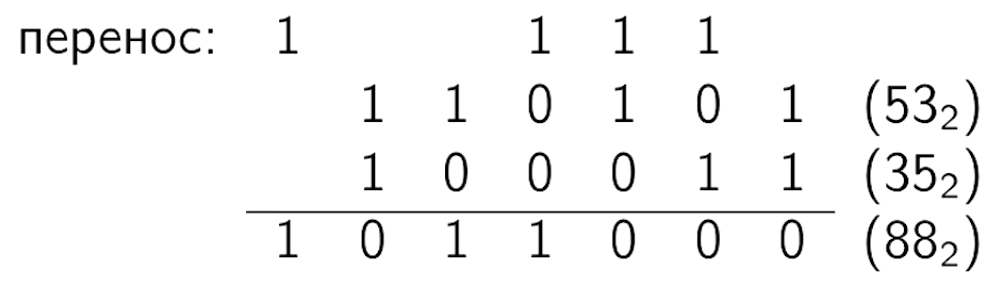

In [4]:
from IPython.display import Image
Image(filename='images/Умножение чисел/addition_1.png')

# Умножение в столбик

Работает за $O(n^2)$.

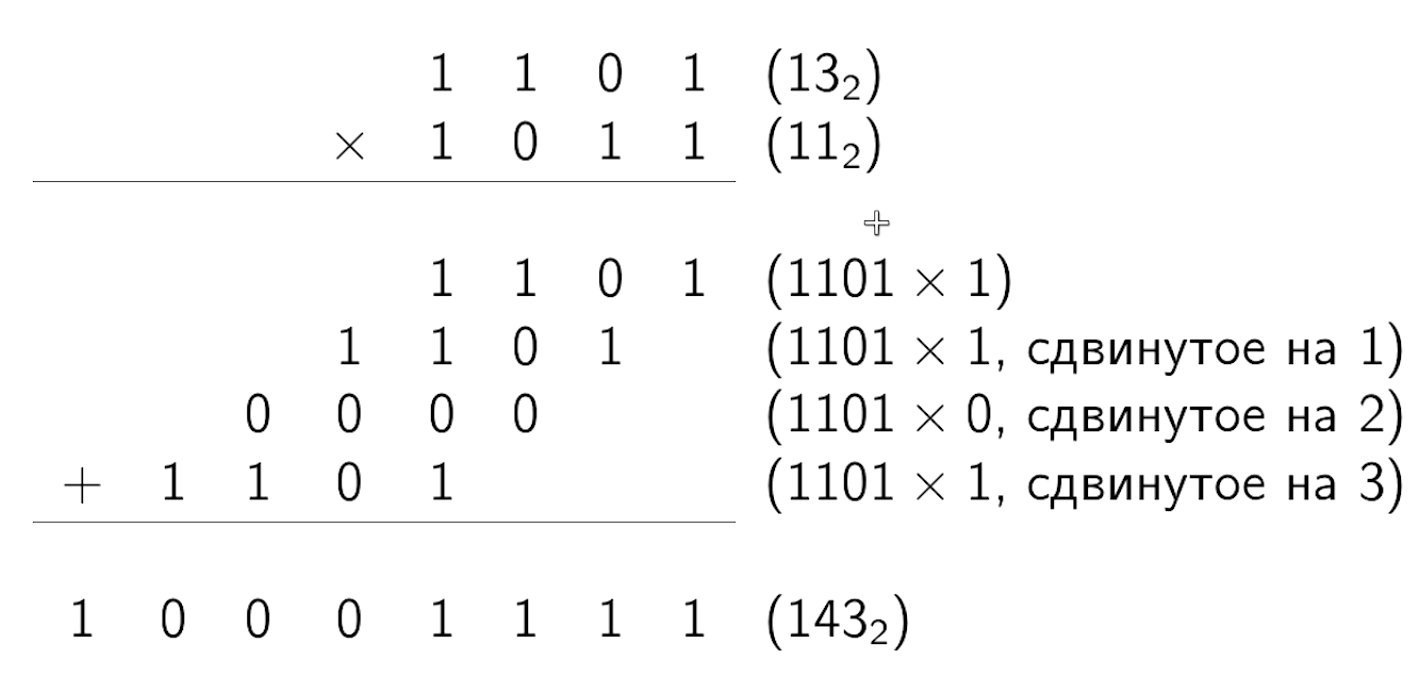

In [5]:
Image(filename='images/Умножение чисел/multiplication_1.png')

# Рекуррентная формула

(на основе ее напишем алгоритм)

$$y = \begin{cases}
2\lfloor \frac{y}{2} \rfloor,&\text{если $y$ четно}\\ 
1 + 2\lfloor \frac{y}{2} \rfloor,& \text{если $y$ нечетно}\end{cases}  $$

$$x \cdot y = \begin{cases}
2(x \cdot \lfloor\frac{y}{2}\rfloor),&\text{если $y$ четно}\\ 
x + 2(x\cdot \lfloor\frac{y}{2}\rfloor),& \text{если $y$ нечетно}\end{cases}  $$

# Алгоритм

(считаем, что оба числа $n$-битовые, иначе спереди допишем нужное количество нулей)

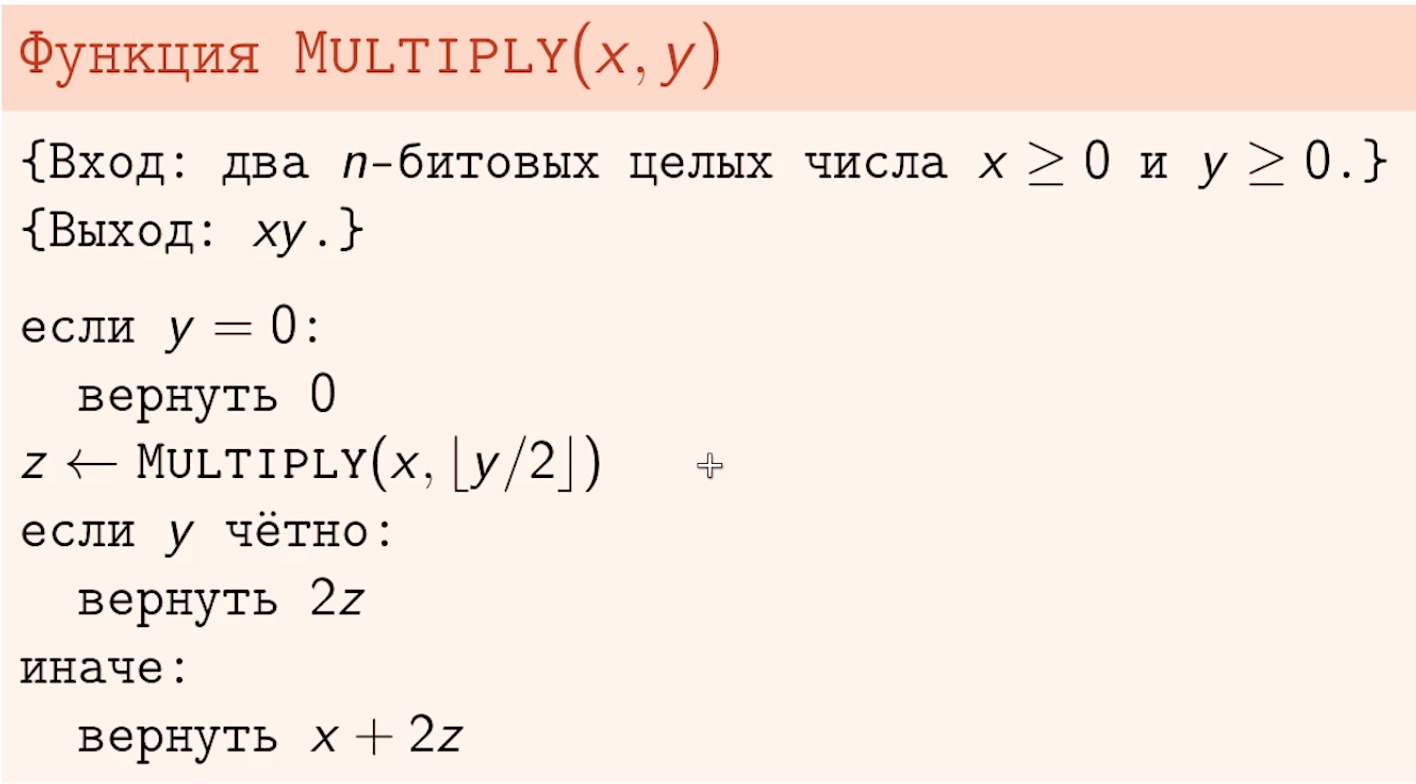

In [13]:
Image(filename='images/Умножение чисел/algorithm_1.png')

# Время работы 

Алгоритм выше работает за $O(n^2)$, так как число битов в записи $y$ уменьшается на 1 с каждым новым вызовом.

# Еще одна рекуррентная формула

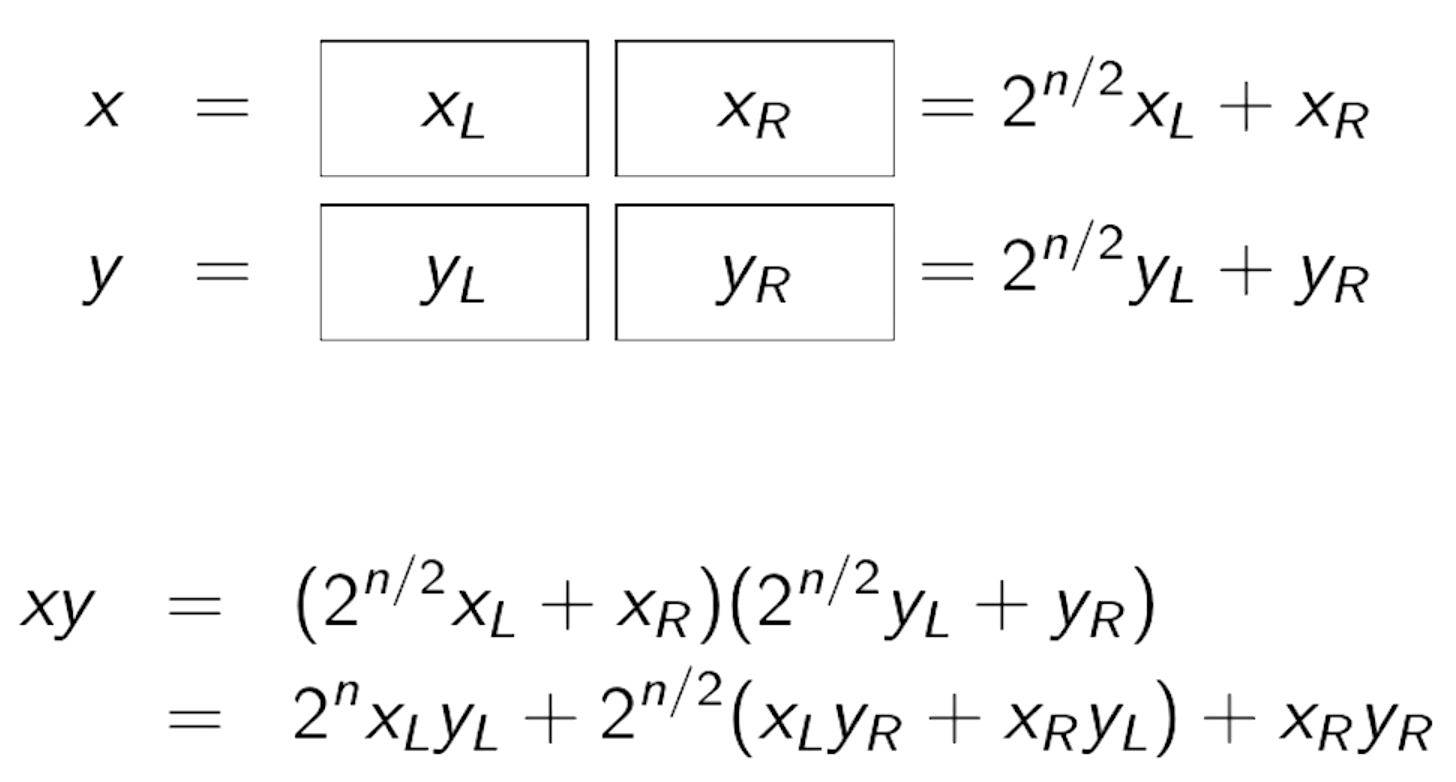

In [12]:
Image(filename='images/Умножение чисел/formula_1.png')

Тогда $T(n) = 4T(\frac{n}{2}) + O(n)$, следовательно $T(n) = O(n^2)$.

# Улучшенная рекуррентная формула

- $xy = 2^nx_Ly_L + 2^{n/2}(x_Ly_R + x_Ry_L) + x_Ry_R$

- вместо четырех рекурсивных вызовов для вычисления $x_Ly_L,\ x_Ly_R,\ x_Ry_L,\ x_Ry_R$, сделаем три для вычисления $$x_Ly_L,\ x_Ry_R \text{ и } (x_L + x_R)(y_L + y_R)$$

- тогда $$(x_Ly_R + x_Ry_L) = (x_L + x_R)(y_L + y_R) - x_Ly_L - x_Ry_R$$

- соответствующее рекуррентное соотношение: $$T(n) = 3T(\frac{n}{2}) + O(n)$$

# Алгоритм Карацубы

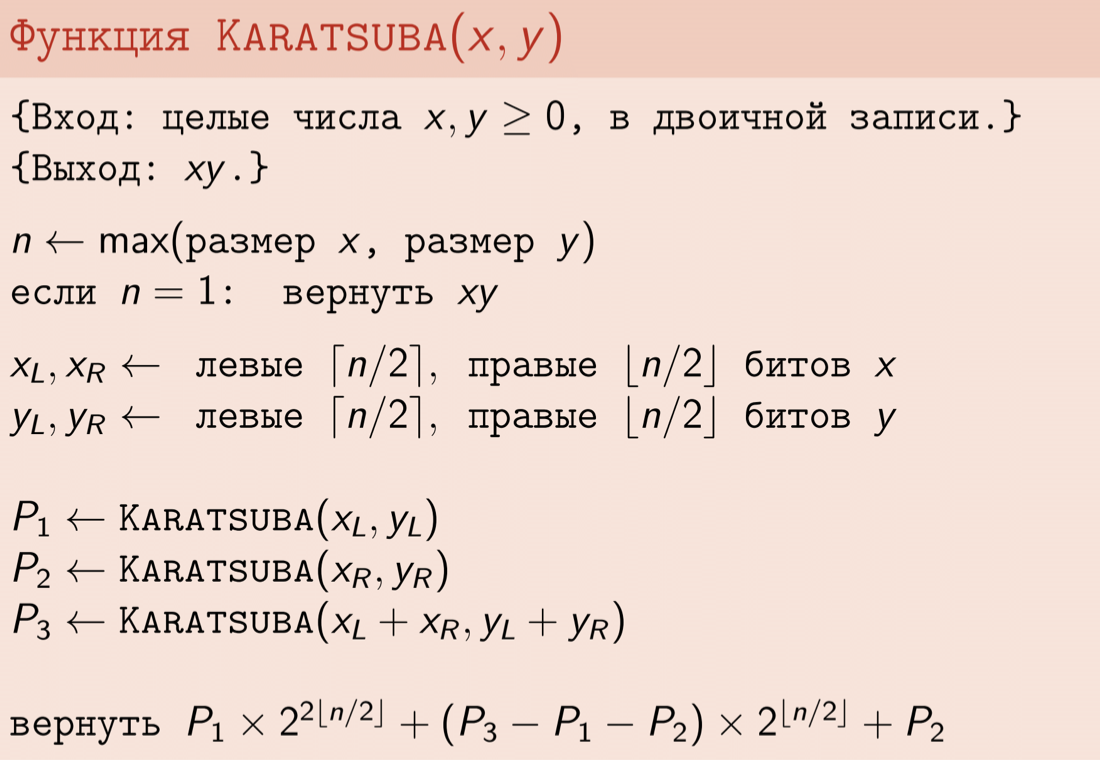

In [9]:
Image(filename='images/Умножение чисел/algorithm_2.png')

# Оценка времени работы

Считаем, что $n$ - степень двойки. В отрезке $[n,\ 2n]$ всегда найдется степень двойки, таким образом просто получили константный множитель.

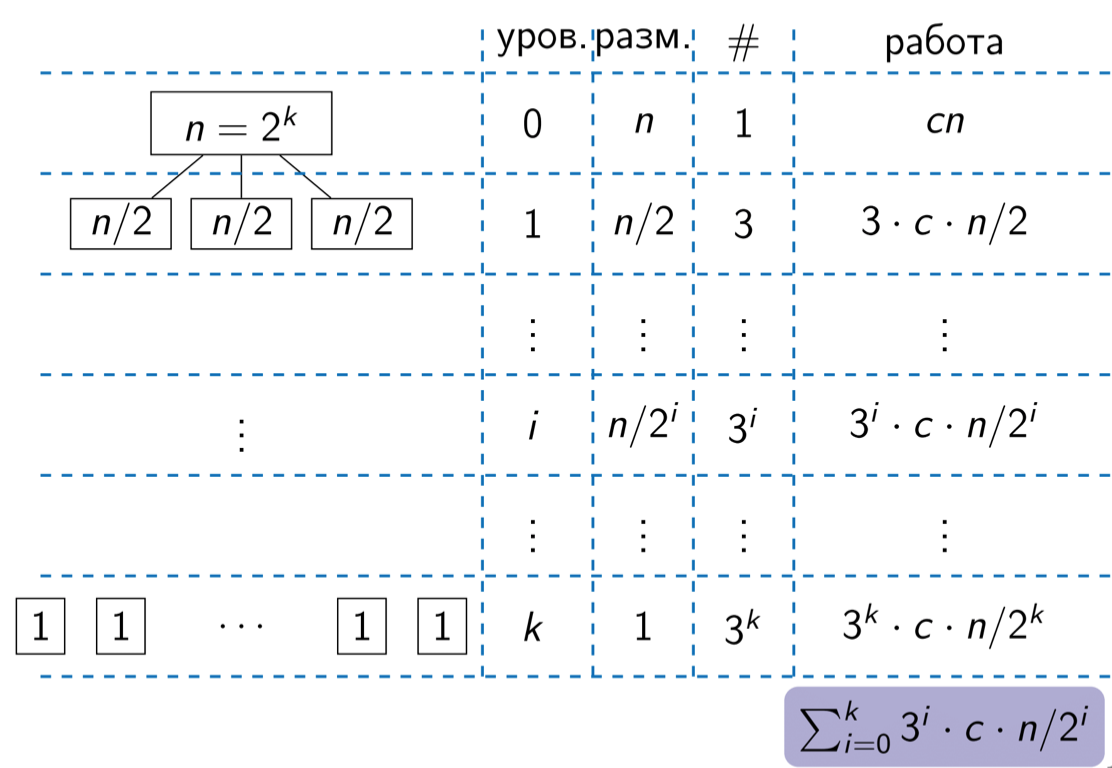

In [10]:
Image(filename='images/Умножение чисел/time_1.png')

## Сумма геометрической прогрессии: формула

- сумма геометрической прогрессии: $1 + c + c^2 + c^3 + \ldots + c^n$

- если домножить на $(c-1)$  и раскрыть скобки почти все сократится: $$(c + c^2 + c^3 + \ldots + c^{n+1}) -(1 + c + c^2 + \ldots + c^n) = c^{n+1} - 1$$

- поэтому при $c \neq 1$ верно равенство $$1 + c + c^2 + c^3 + \ldots + c^n = \frac{c^{n+1} - 1}{c - 1}$$

## Сумма геометрической прогрессии: скорость роста

$$1 + c + c^2 + c^3 + \ldots + c^n = \begin{cases}
\Theta(1)&\text{если $c<1$}\\ 
\Theta(n)& \text{если $c=1$}\\
\Theta(c^n)&\text{если $c>1$}\\ \end{cases}  $$

- если $c < 1$, $$1 < \frac{c^{n+1} - 1}{c - 1} < \frac{1}{1 - c}$$

- если $c > 1$, $$c^n < \frac{c^{n+1} - 1}{c - 1} < \frac{c}{c-1}c^n$$

## Оценка на время работы

- Оценим время работы, $$\sum\limits_{i=0}^{k} 3^i \cdot c \cdot \frac{n}{2^i} = cn \cdot \sum \limits_{i=0}^{k} \Big(\frac{3}{2}\Big)^i = cn \cdot \sum \limits_{i=0}^{\log_2 n} \Big(\frac{3}{2}\Big)^i = cn \cdot \Theta\Big(\frac{3^{\log_2 n}}{2^{\log_2 n}}\Big) = \Theta(n^{\log_2 3}).$$

# Заключение

- сложение двух $n$-битовых чисел: $O(n)$

- умножение двух $n$-битовых чисел в столбик: $O(n^2)$

- алгоритм Карацубы умножения двух $n$-битовых чисел: $O(n^{1.59})$

# Задача

Докажите, что если существует алгоритм, возводящий $n$-битовое число в квадрат за время $f(n)$, то с его помощью можно перемножить два $n$-битовых числа за время $O(f(n))$ (считаем, что функция $f$ не убывает и что $f(n+1)=O(f(n)))$.

__Решение__.

$(a+b)^2=a^2 +2ab+b^2$.  Отсюда $ab = ((a+b)^2-a^2 -b^2 )/2$. Время работы алгоритма $T(n)= f(n+1) + 2f(n) +C$. По предположению $f(n+1)=O(f(n))$. Тогда $T(n)= O(f(n))$.